In [3]:
import os 
import glob
import numpy as np
import rplanpy
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [4]:
image_dir = '../dataset/floorplan_dataset_temp'
#dataset/floorplan_dataset_temp
image_files = glob.glob(os.path.join(image_dir,'*.png'))
image_files

['../dataset/floorplan_dataset_temp/1.png',
 '../dataset/floorplan_dataset_temp/12.png',
 '../dataset/floorplan_dataset_temp/18.png',
 '../dataset/floorplan_dataset_temp/7.png',
 '../dataset/floorplan_dataset_temp/10.png',
 '../dataset/floorplan_dataset_temp/3.png',
 '../dataset/floorplan_dataset_temp/9.png',
 '../dataset/floorplan_dataset_temp/19.png',
 '../dataset/floorplan_dataset_temp/8.png',
 '../dataset/floorplan_dataset_temp/17.png',
 '../dataset/floorplan_dataset_temp/6.png',
 '../dataset/floorplan_dataset_temp/11.png',
 '../dataset/floorplan_dataset_temp/15.png',
 '../dataset/floorplan_dataset_temp/14.png',
 '../dataset/floorplan_dataset_temp/4.png',
 '../dataset/floorplan_dataset_temp/2.png',
 '../dataset/floorplan_dataset_temp/5.png',
 '../dataset/floorplan_dataset_temp/0.png',
 '../dataset/floorplan_dataset_temp/13.png',
 '../dataset/floorplan_dataset_temp/16.png',
 '../dataset/floorplan_dataset_temp/20.png']

In [13]:
#function to extract site bounding box from image channel , and visualize it.


# row y , col x axis
def extract_site_bounding_box(data):

    plt.imshow(data.image,origin='lower')
    ax = plt.gca()


    G = data.get_graph()

    min_row,min_col,max_row,max_col = G.graph['site_bounding_box']

    rect = Rectangle((min_col ,min_row),max_col-min_col , max_row-min_row,linewidth=2,edgecolor='r',facecolor='none')

    ax.add_patch(rect)

    edgecolor = ['r','b','g','y','r','g']

    
    for node in G.nodes:
        min_row,min_col,max_row,max_col = G.nodes[node]['bounding_box'];
        print(f"room bounding box: {min_row} {min_col} {max_row} {max_col}")
        # rect = Rectangle((min_col, min_row), max_col-min_col, max_row-min_row,linewidth=3, edgecolor=edgecolor[node])
        # ax.add_patch(rect)

    plt.show()

Site bounding box: 25 69 231 187
../dataset/floorplan_dataset_temp/0.png
room bounding box: 161 72 221 125
room bounding box: 130 72 158 108
room bounding box: 28 111 204 185
room bounding box: 87 72 127 125
room bounding box: 53 115 84 145
room bounding box: 207 128 229 185


IndexError: list index out of range

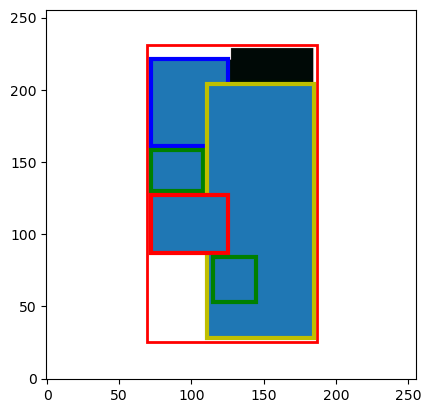

In [14]:
data = rplanpy.data.RplanData(image_files[17])
data.set_graph()
data.get_graph()
print(image_files[17])
extract_site_bounding_box(data)

In [1]:
import h5py as h5

indices = []
cummulative_samples = 0
path = './preprocess_data/batch_0.h5'
file = h5.File(path,'r')
# print(file['room_category'][:])
# print(file['room_category_lens'][:])
file.keys()

<KeysViewHDF5 ['edge_offsets', 'edges_door', 'edges_location', 'edges_src', 'edges_tgt', 'room_area_lens', 'room_area_norm', 'room_bb_norm', 'room_bb_norm_lens', 'room_category', 'room_category_lens', 'site_dim']>

In [2]:
room_area_len = file['room_area_lens'][0]
room_area_padded = file['room_area_norm'][0]
room_area_norm = room_area_padded[:room_area_len]

KeyError: "Unable to open object (object 'room_area_norm_lens' doesn't exist)"